In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [73]:
#loading the given datasets:
df1=pd.read_csv('customer_retention_dataset.xlsx - codedsheet.csv')
df1

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [74]:
df=pd.DataFrame(data=df1)
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [75]:
# Dropping columns which is not in use with target variable i.e pin code having can be unaffective.
df.drop("4 What is the Pin Code of where you shop online from?", axis=1,inplace=True)

In [76]:
#Shape of the data 
df.shape

(269, 70)

In [77]:
#First ten rows of the data
df.head(10)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,5,4,4,3,5,1,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,5,5,2,1,2,3,1,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,4,5,3,1,4,2,1,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,4,1,3,1,4,3,2,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,3,2,2,1,2,3,2,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
5,1,3,Noida,5,5,2,1,4,2,1,...,"Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com",Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com"
6,0,4,Delhi,5,4,2,4,5,2,1,...,"Amazon.in, Flipkart.com, Snapdeal.com",Amazon.in,Myntra.com,Myntra.com,Flipkart.com,Snapdeal.com,Myntra.com,Myntra.com,Snapdeal.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
7,0,4,Delhi,4,1,3,3,5,1,1,...,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Flipkart.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
8,1,1,Solan,3,1,2,1,4,2,1,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in
9,1,3,Delhi,1,1,2,2,5,1,1,...,Paytm.com,"Amazon.in, Flipkart.com",Paytm.com,Paytm.com,Snapdeal.com,Snapdeal.com,Myntra.com,Myntra.com,Flipkart.com,Flipkart.com


In [78]:
#Last five rows of the data
df.tail()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
264,1,2,Solan,2,1,3,1,4,2,4,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,2,4,3,1,5,2,1,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,3,1,3,2,5,1,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,3,1,2,1,4,2,1,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in
268,1,4,Ghaziabad,3,4,3,1,4,2,1,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in


In [79]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 70 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

In [80]:
df.describe()

,1Gender of respondent,2 How old are you?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,1.360595,...,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,0.897805,...,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773
min,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,1.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


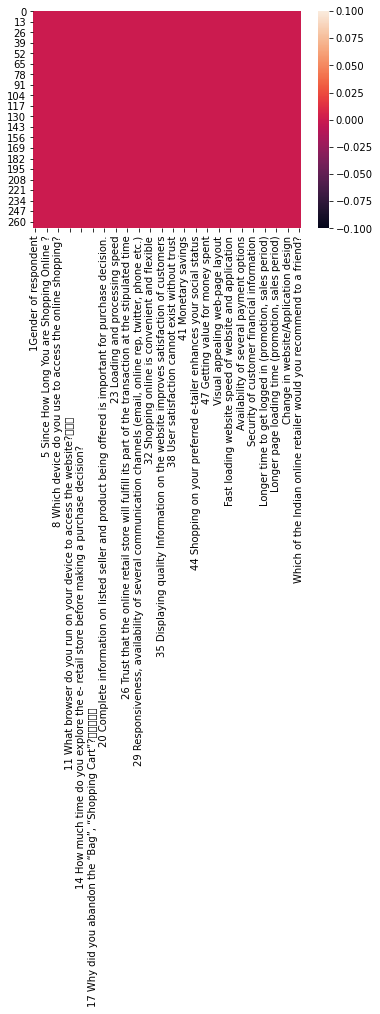

In [81]:
sns.heatmap(df.isnull())

In [82]:
df.isnull().sum()

1Gender of respondent                                                    0
2 How old are you?                                                       0
3 Which city do you shop online from?                                    0
5 Since How Long You are Shopping Online ?                               0
6 How many times you have made an online purchase in the past 1 year?    0
                                                                        ..
Longer delivery period                                                   0
Change in website/Application design                                     0
Frequent disruption when moving from one page to another                 0
Website is as efficient as before                                        0
Which of the Indian online retailer would you recommend to a friend?     0
Length: 70, dtype: int64

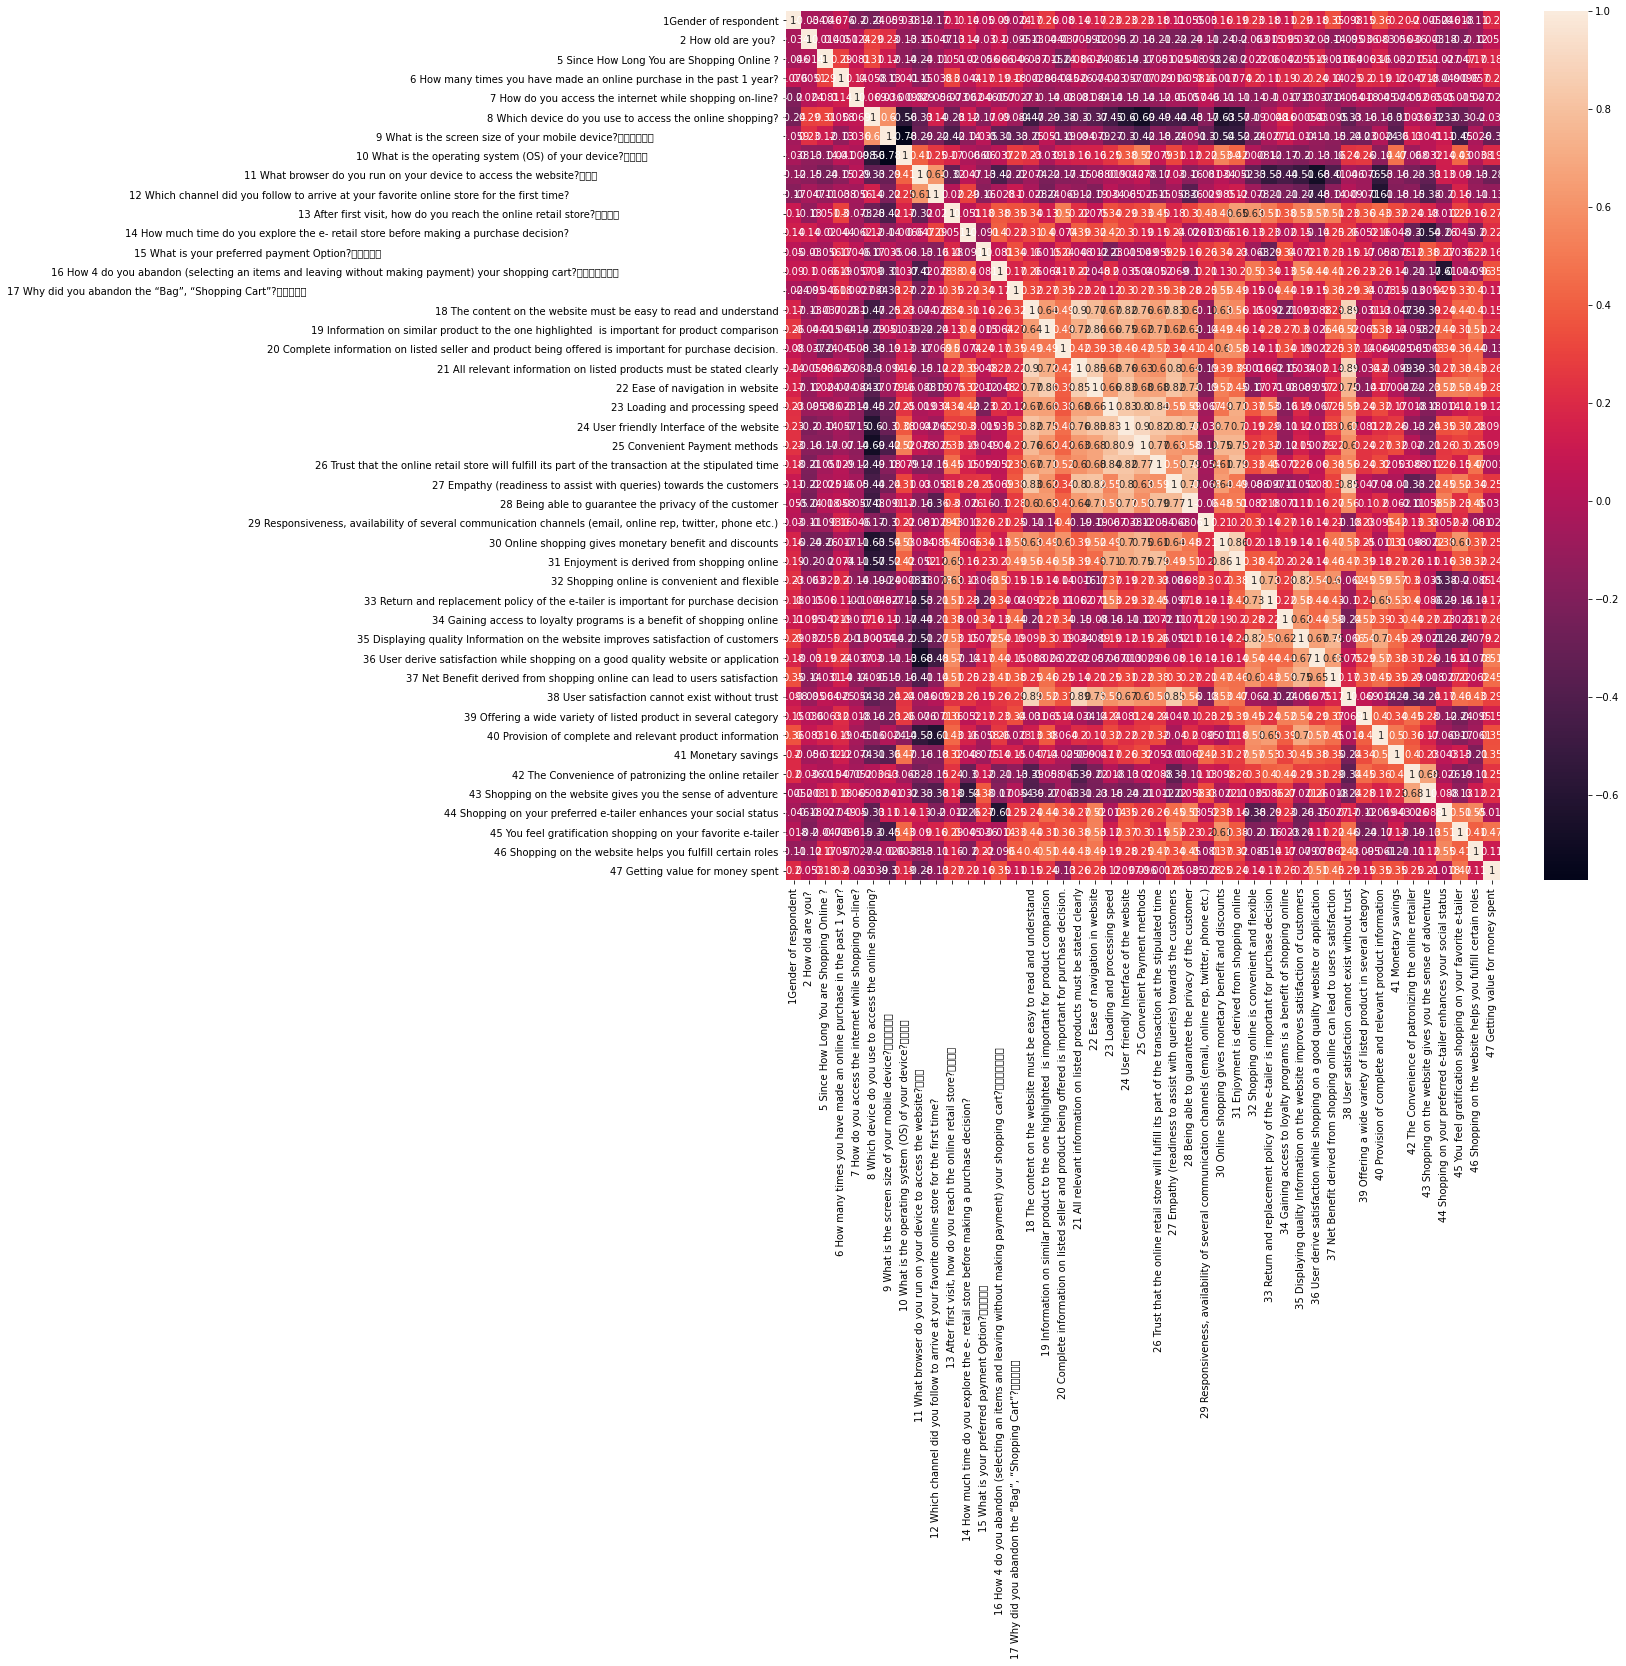

In [83]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7d7283460>,
      dtype=object)

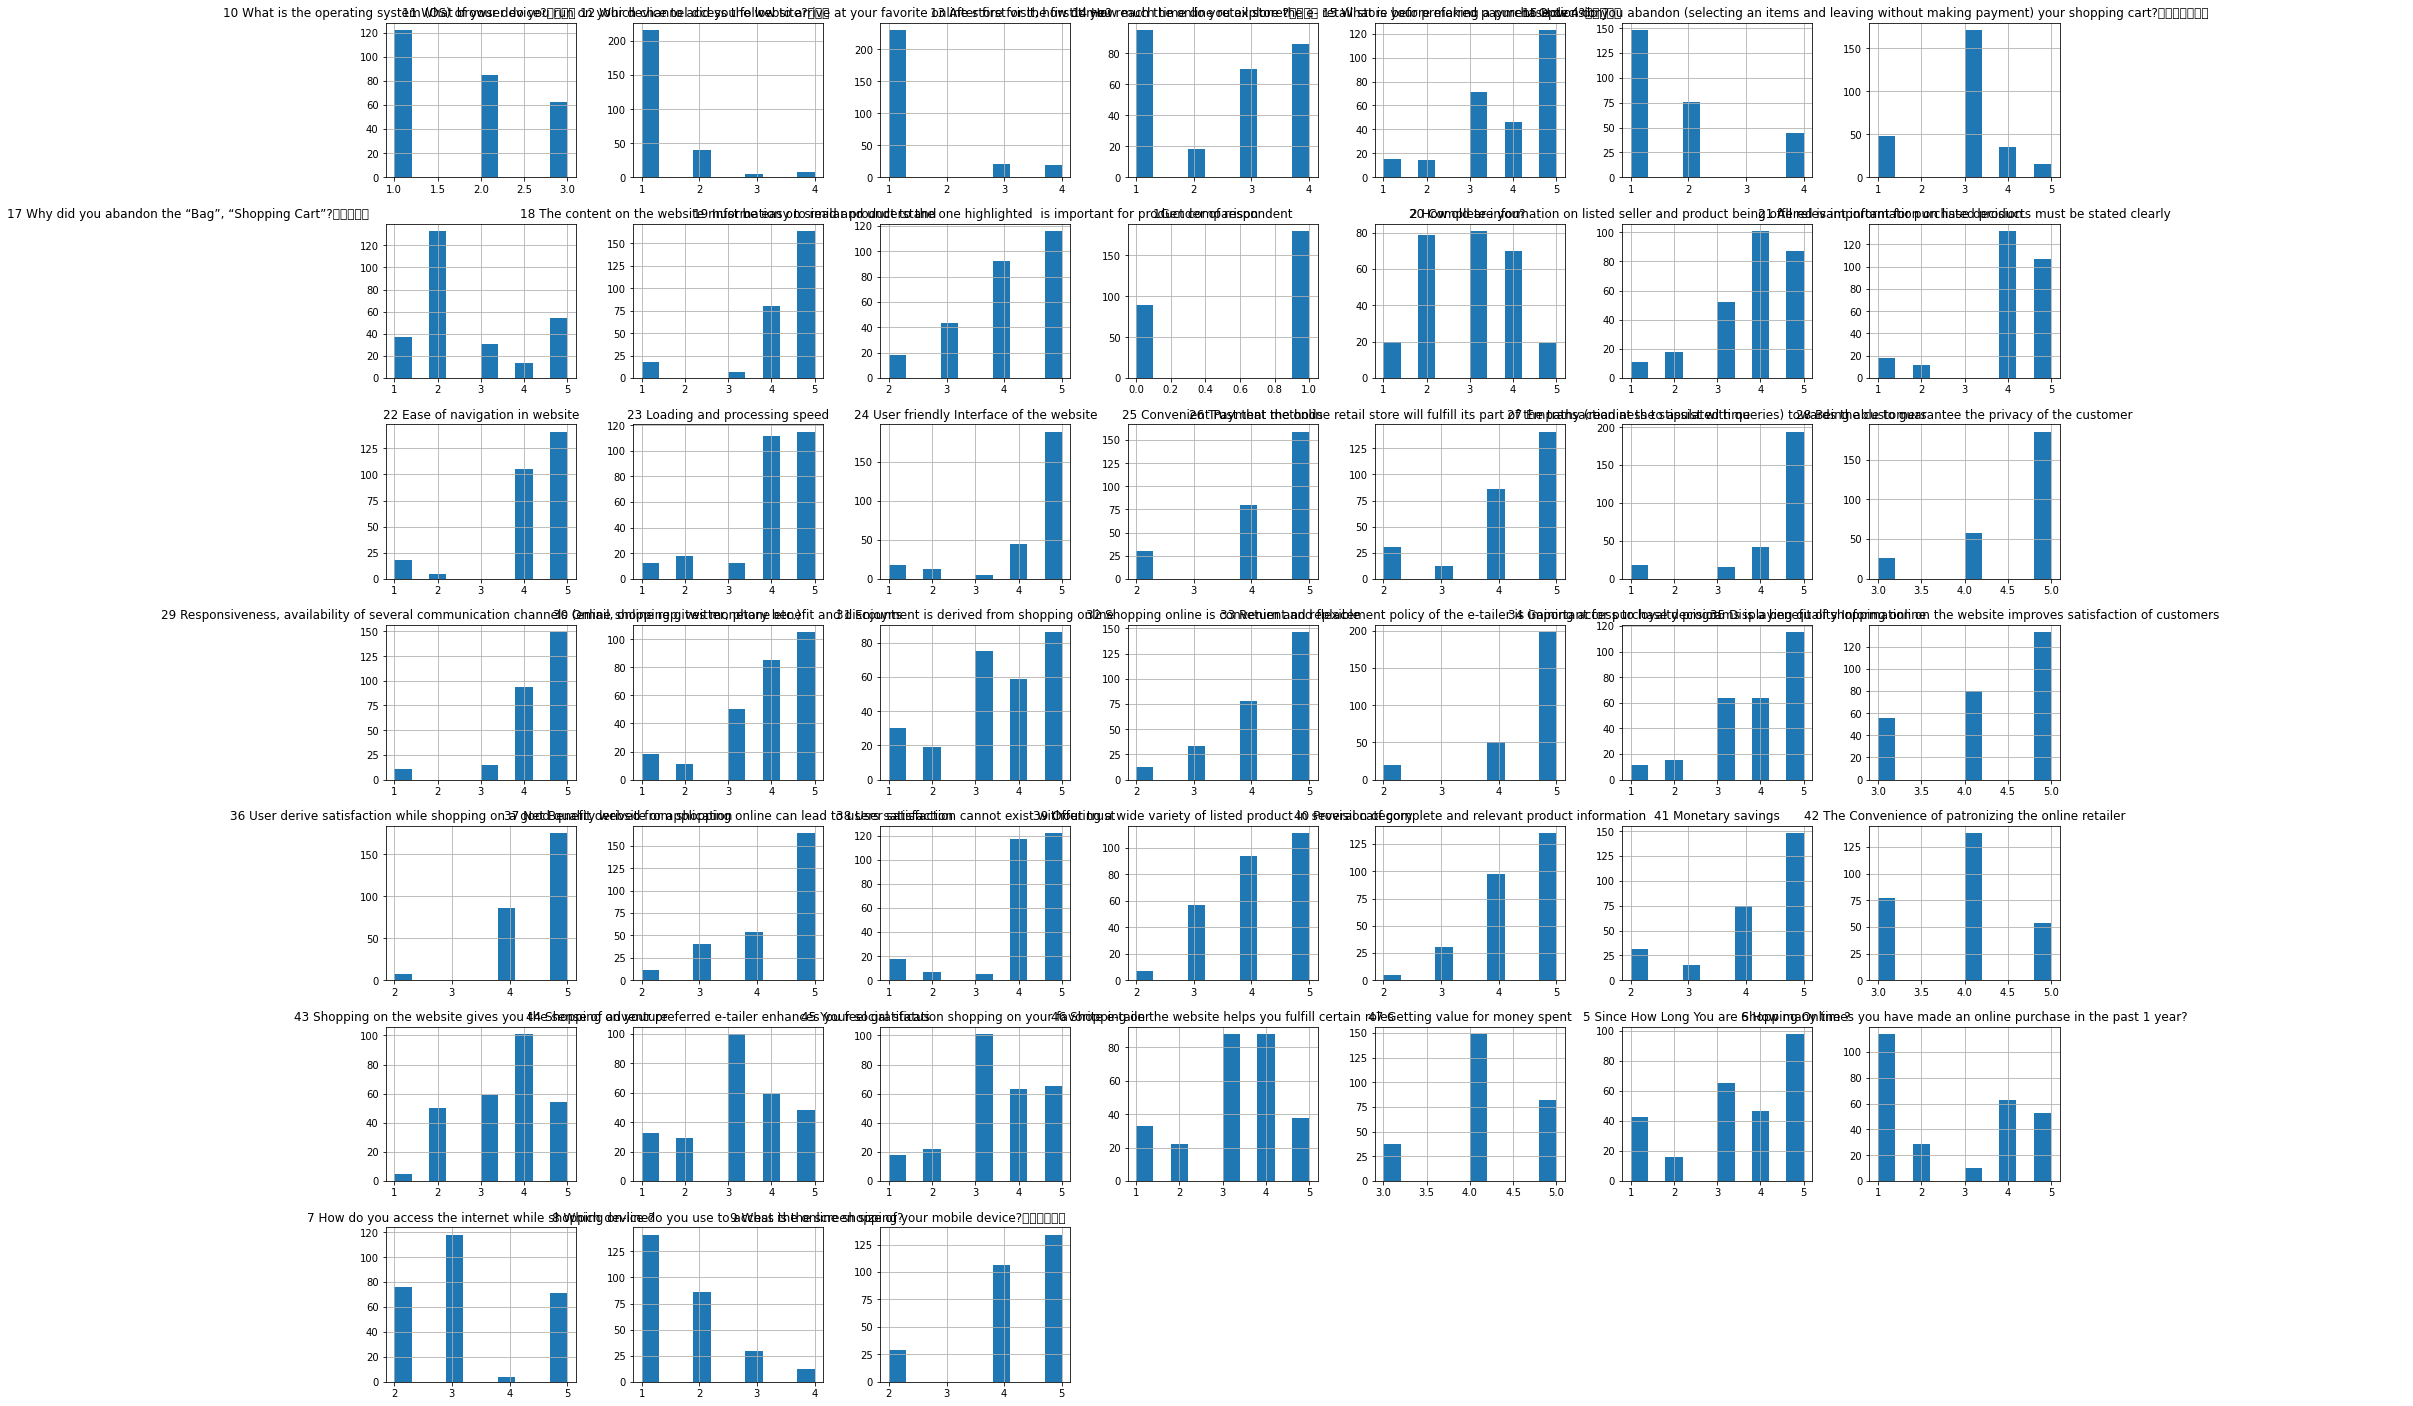

In [84]:
df.hist(figsize=(30,25))

In [85]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['1Gender of respondent', '2 How old are you? ',
        '5 Since How Long You are Shopping Online ?',
        '6 How many times you have made an online purchase in the past 1 year?',
        '7 How do you access the internet while shopping on-line?',
        '8 Which device do you use to access the online shopping?',
        '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
        '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
        '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
        '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
        '13 After first visit, how do you reach the online retail store?\t\t\t\t                                         

In [86]:
df.shape

(269, 70)

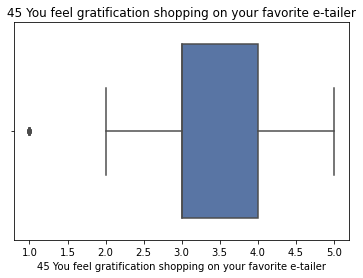

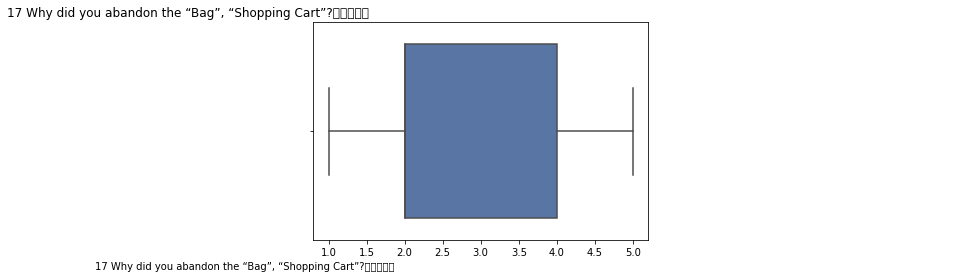

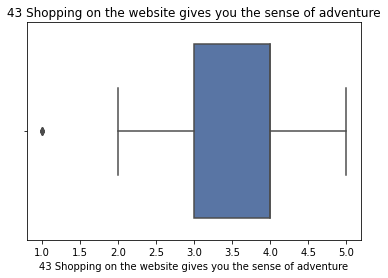

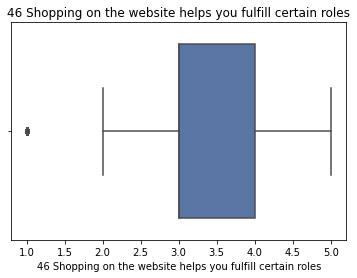

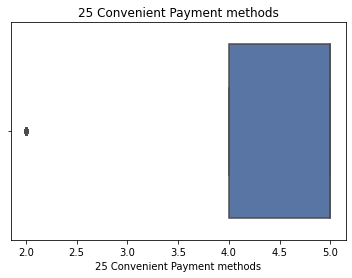

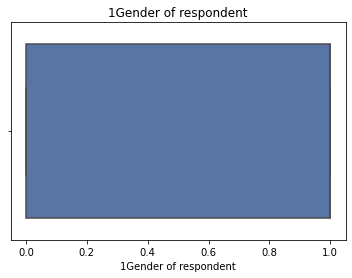

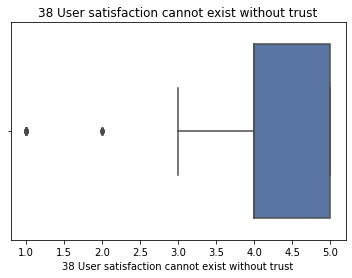

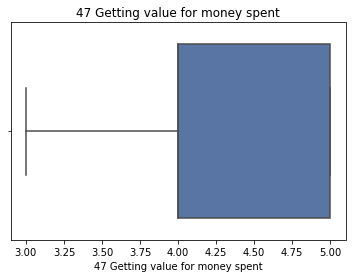

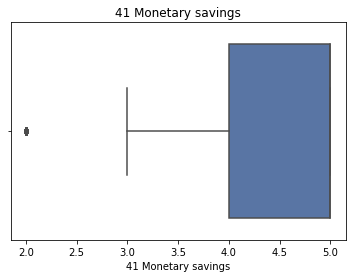

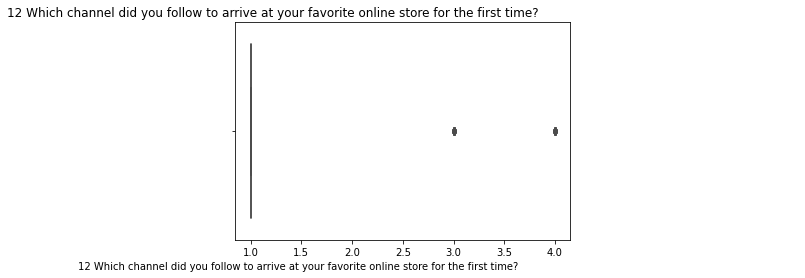

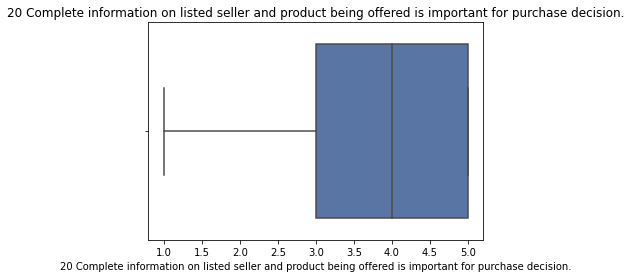

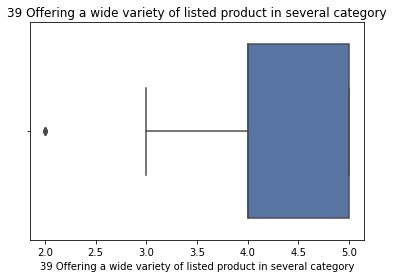

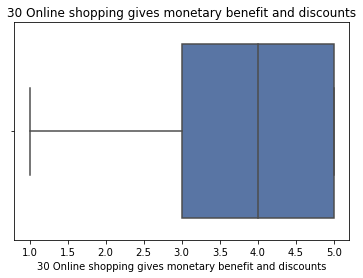

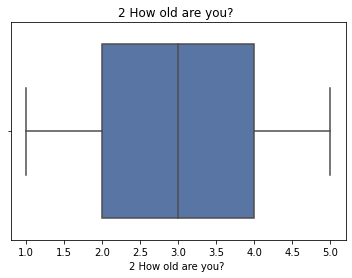

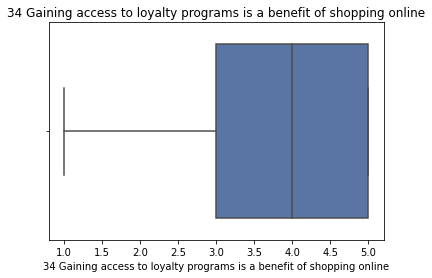

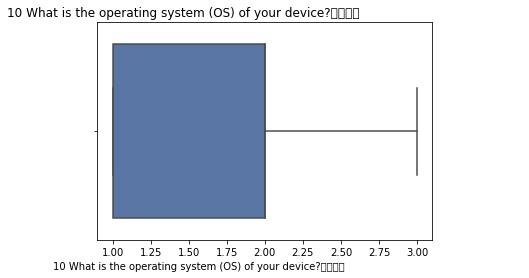

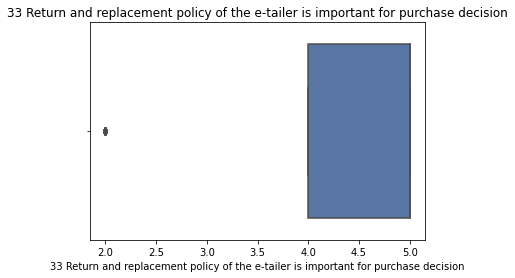

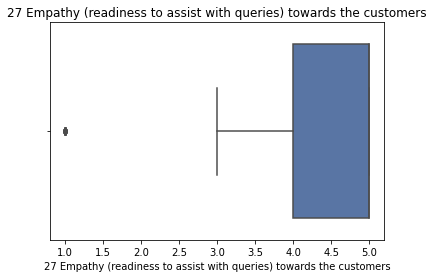

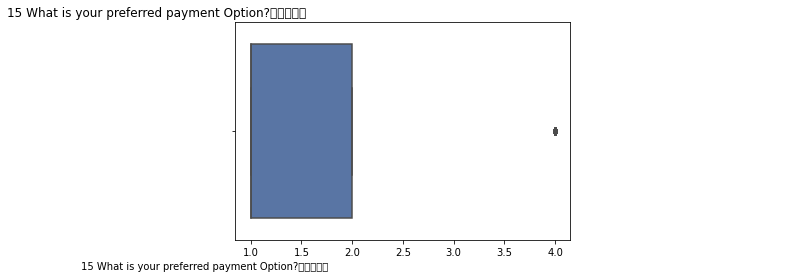

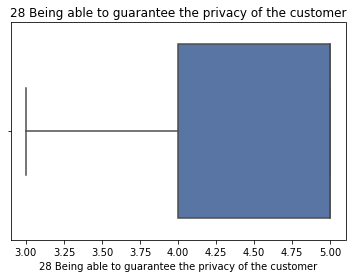

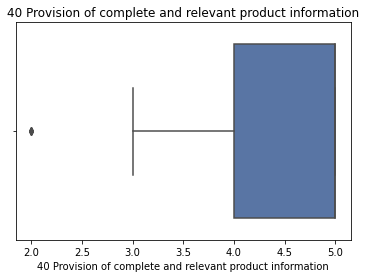

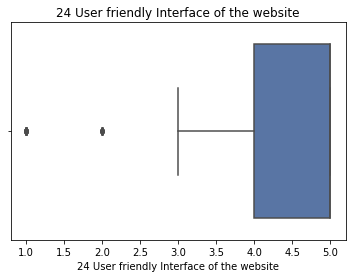

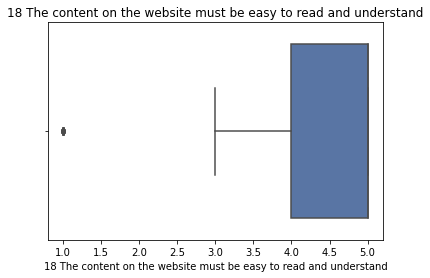

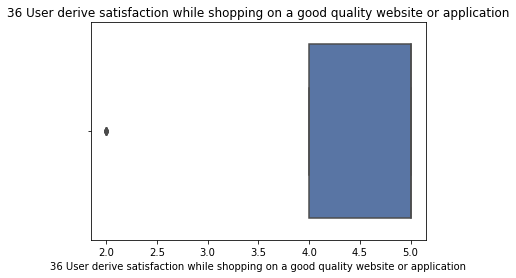

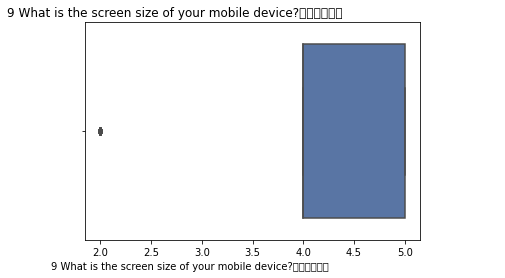

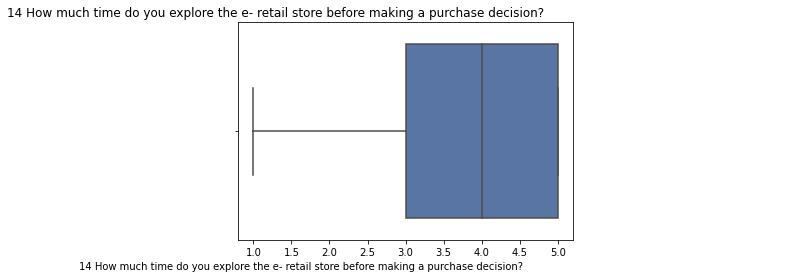

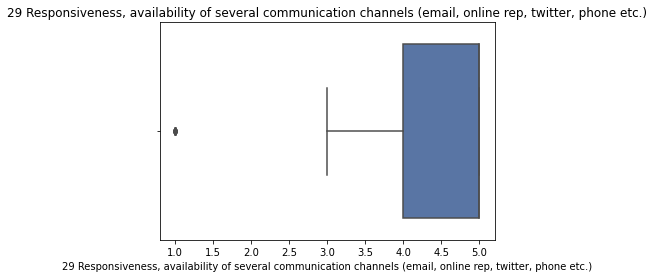

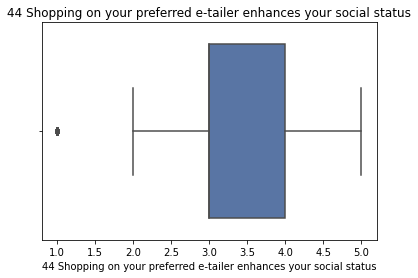

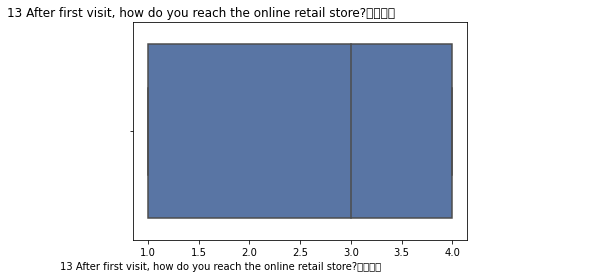

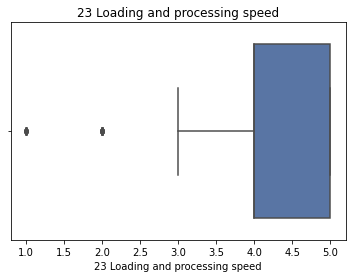

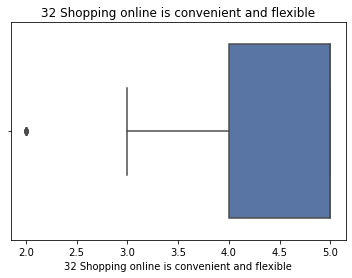

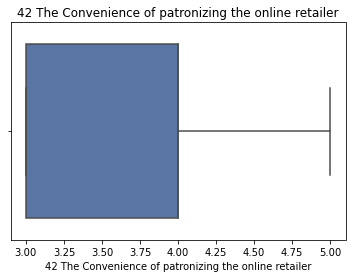

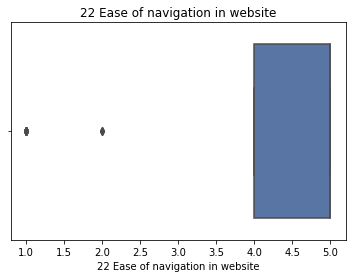

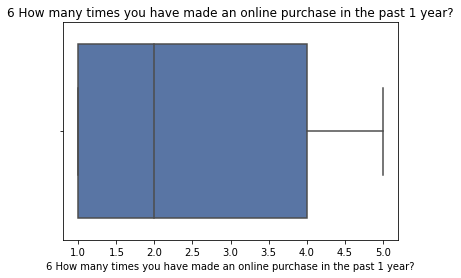

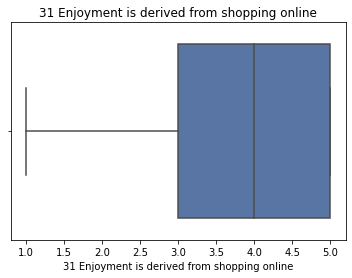

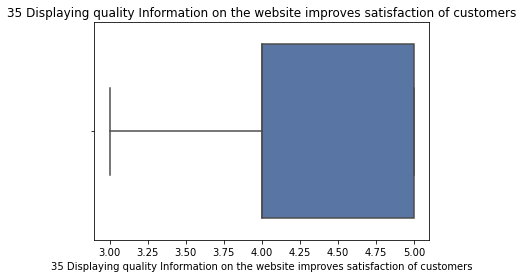

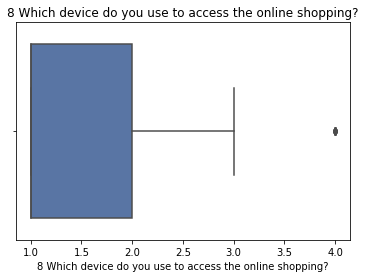

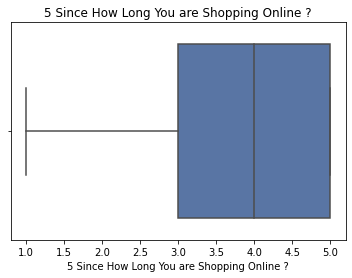

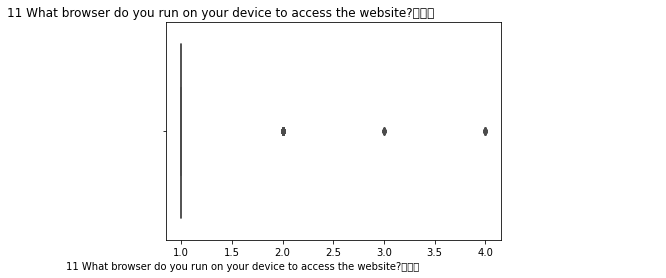

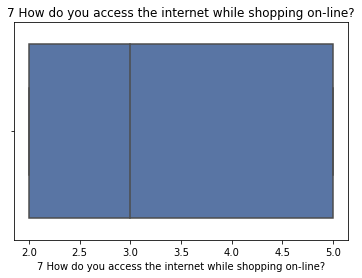

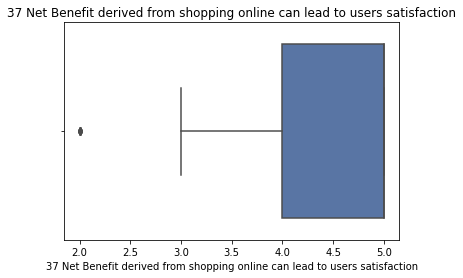

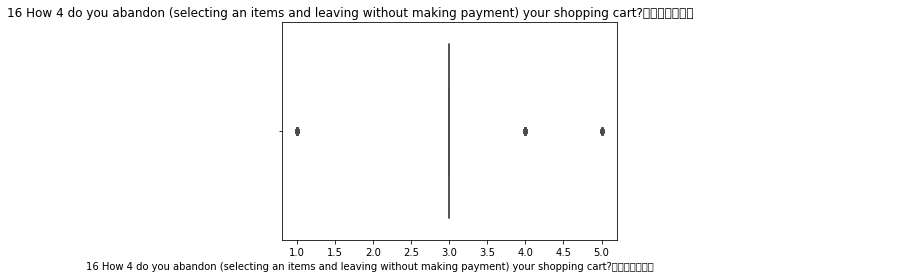

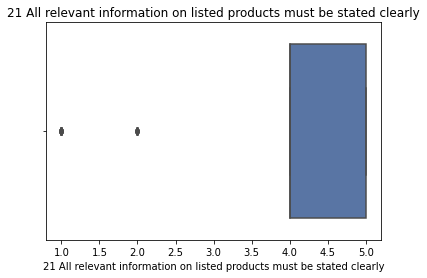

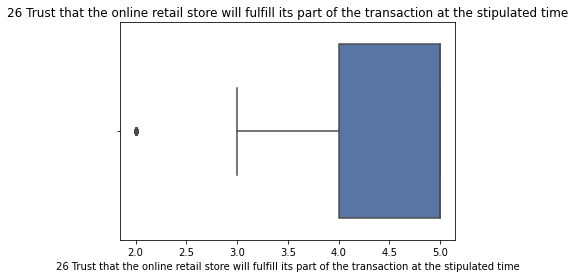

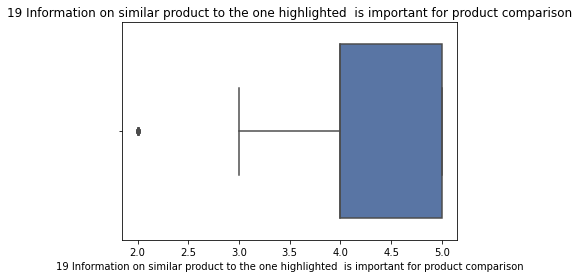

In [87]:
columns={'1Gender of respondent', '2 How old are you? ',
        '5 Since How Long You are Shopping Online ?',
        '6 How many times you have made an online purchase in the past 1 year?',
        '7 How do you access the internet while shopping on-line?',
        '8 Which device do you use to access the online shopping?',
        '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
        '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
        '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
        '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
        '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
        '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
        '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
        '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
        '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
        '18 The content on the website must be easy to read and understand',
        '19 Information on similar product to the one highlighted  is important for product comparison',
        '20 Complete information on listed seller and product being offered is important for purchase decision.',
        '21 All relevant information on listed products must be stated clearly',
        '22 Ease of navigation in website', '23 Loading and processing speed',
        '24 User friendly Interface of the website',
        '25 Convenient Payment methods',
        '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
        '27 Empathy (readiness to assist with queries) towards the customers',
        '28 Being able to guarantee the privacy of the customer',
        '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
        '30 Online shopping gives monetary benefit and discounts',
        '31 Enjoyment is derived from shopping online',
        '32 Shopping online is convenient and flexible',
        '33 Return and replacement policy of the e-tailer is important for purchase decision',
        '34 Gaining access to loyalty programs is a benefit of shopping online',
        '35 Displaying quality Information on the website improves satisfaction of customers',
        '36 User derive satisfaction while shopping on a good quality website or application',
        '37 Net Benefit derived from shopping online can lead to users satisfaction',
        '38 User satisfaction cannot exist without trust',
        '39 Offering a wide variety of listed product in several category',
        '40 Provision of complete and relevant product information',
        '41 Monetary savings',
        '42 The Convenience of patronizing the online retailer',
        '43 Shopping on the website gives you the sense of adventure',
        '44 Shopping on your preferred e-tailer enhances your social status',
        '45 You feel gratification shopping on your favorite e-tailer',
        '46 Shopping on the website helps you fulfill certain roles',
        '47 Getting value for money spent'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

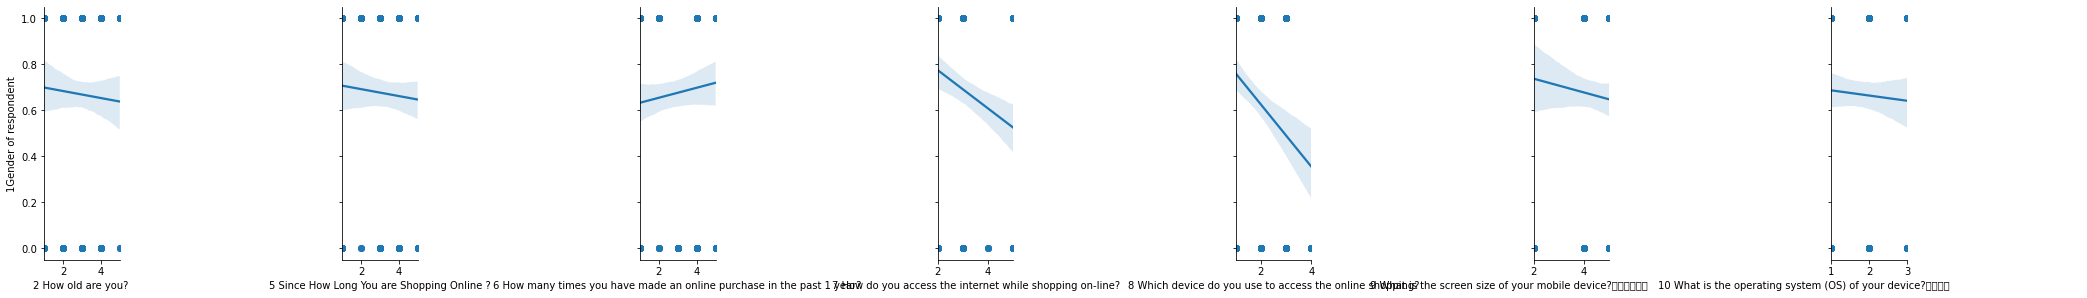

In [88]:
sns.pairplot(df, x_vars=['2 How old are you? ',
        '5 Since How Long You are Shopping Online ?',
        '6 How many times you have made an online purchase in the past 1 year?',
        '7 How do you access the internet while shopping on-line?',
        '8 Which device do you use to access the online shopping?',
        '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
        '10 What is the operating system (OS) of your device?\t\t\t\t                                          '], y_vars='1Gender of respondent', size=4, aspect=1, kind='reg')

In [89]:
def dis_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 50)
    plt.show()

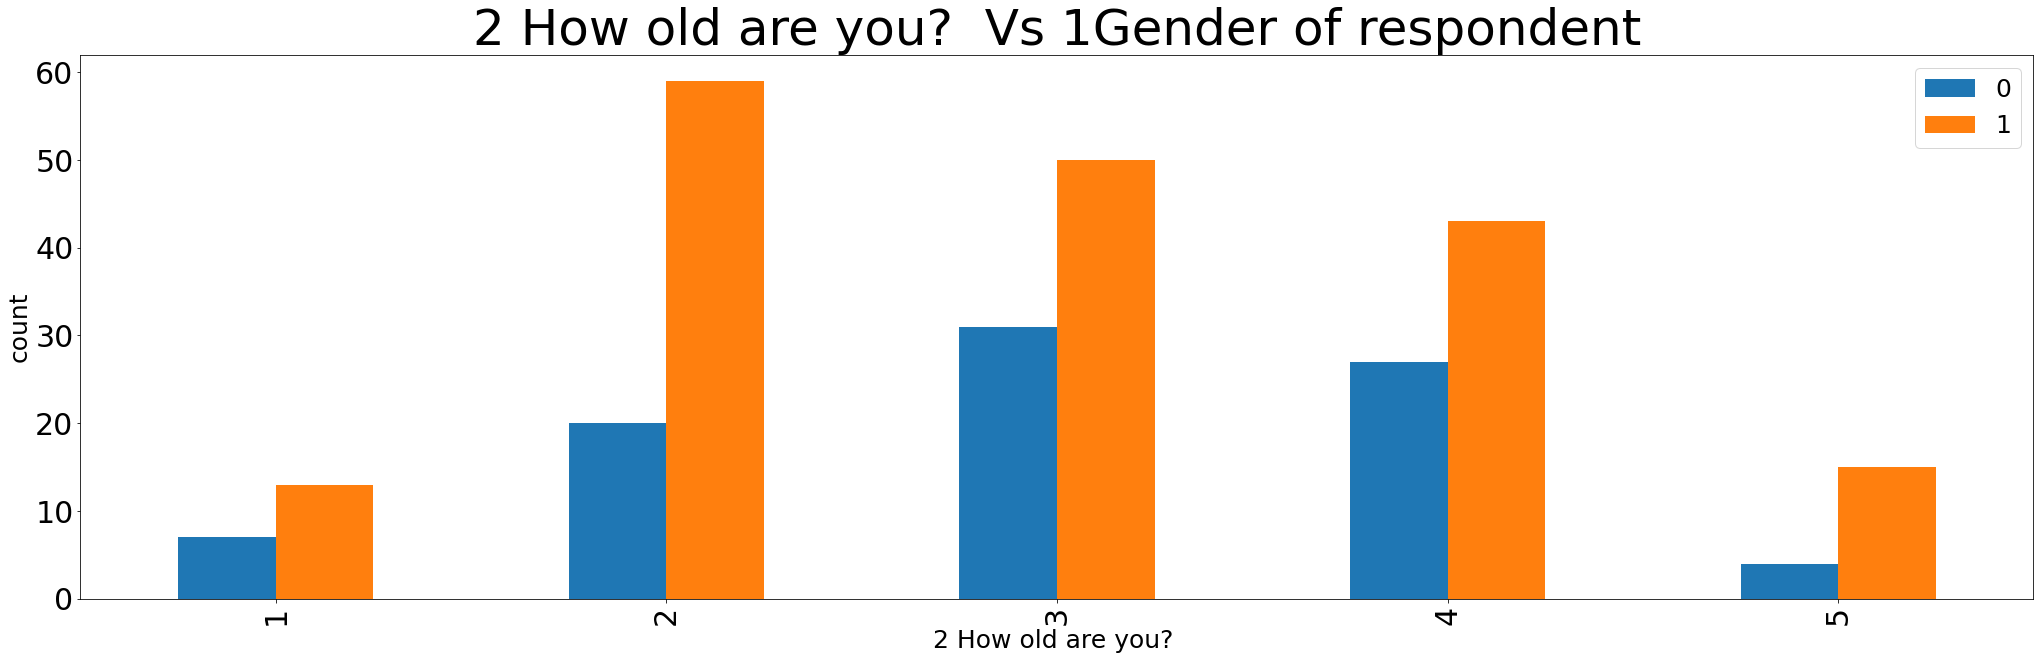

In [90]:
dis_bar('2 How old are you? ','1Gender of respondent')

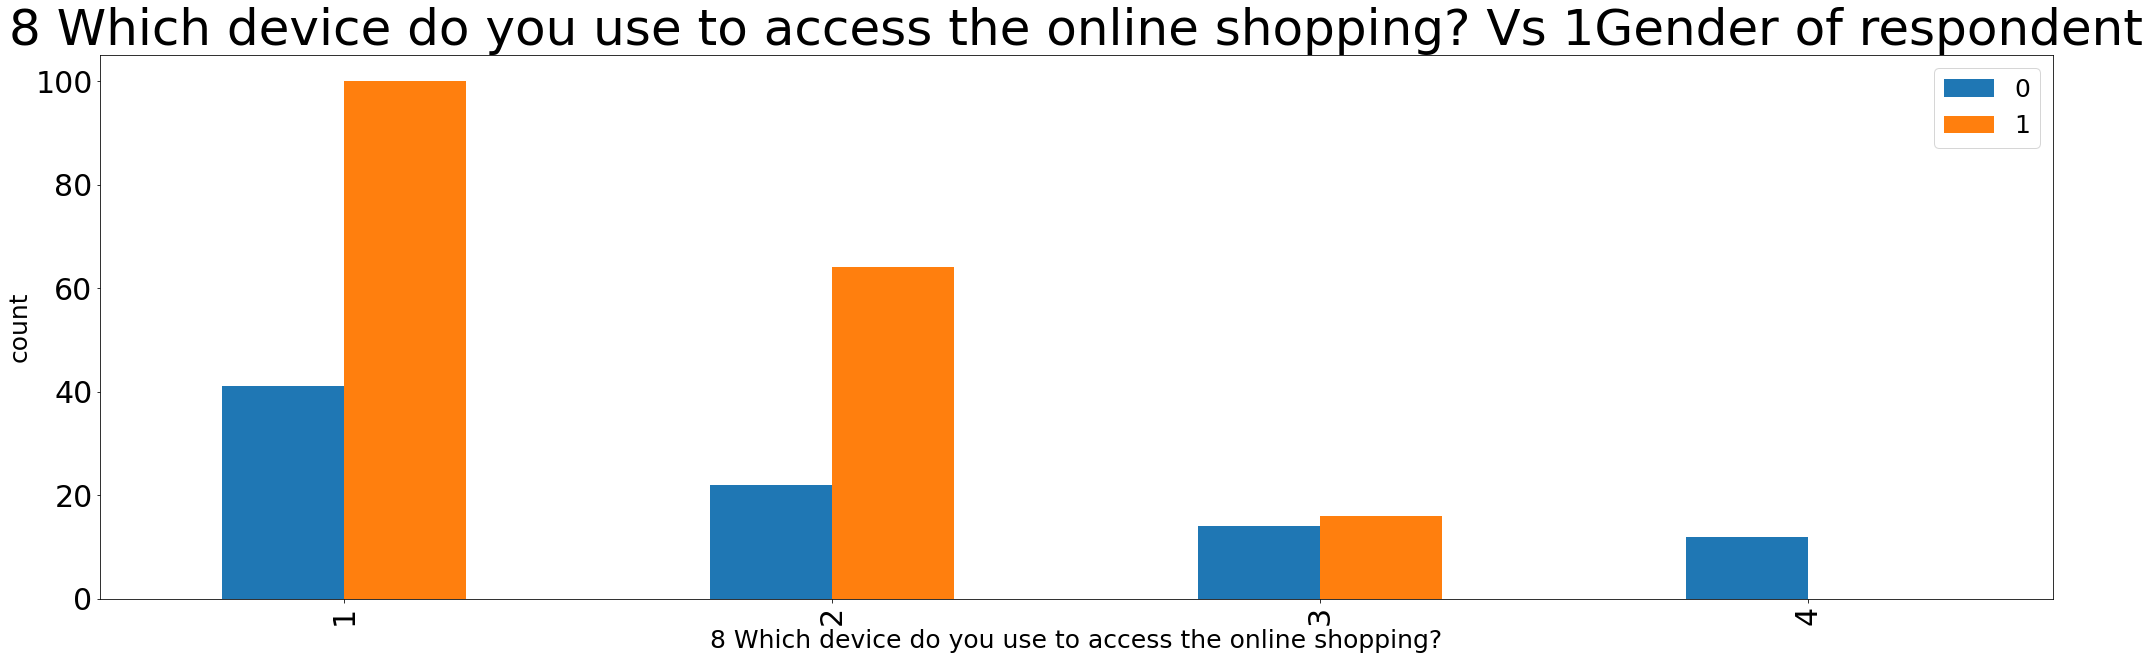

In [91]:
dis_bar('8 Which device do you use to access the online shopping?','1Gender of respondent')

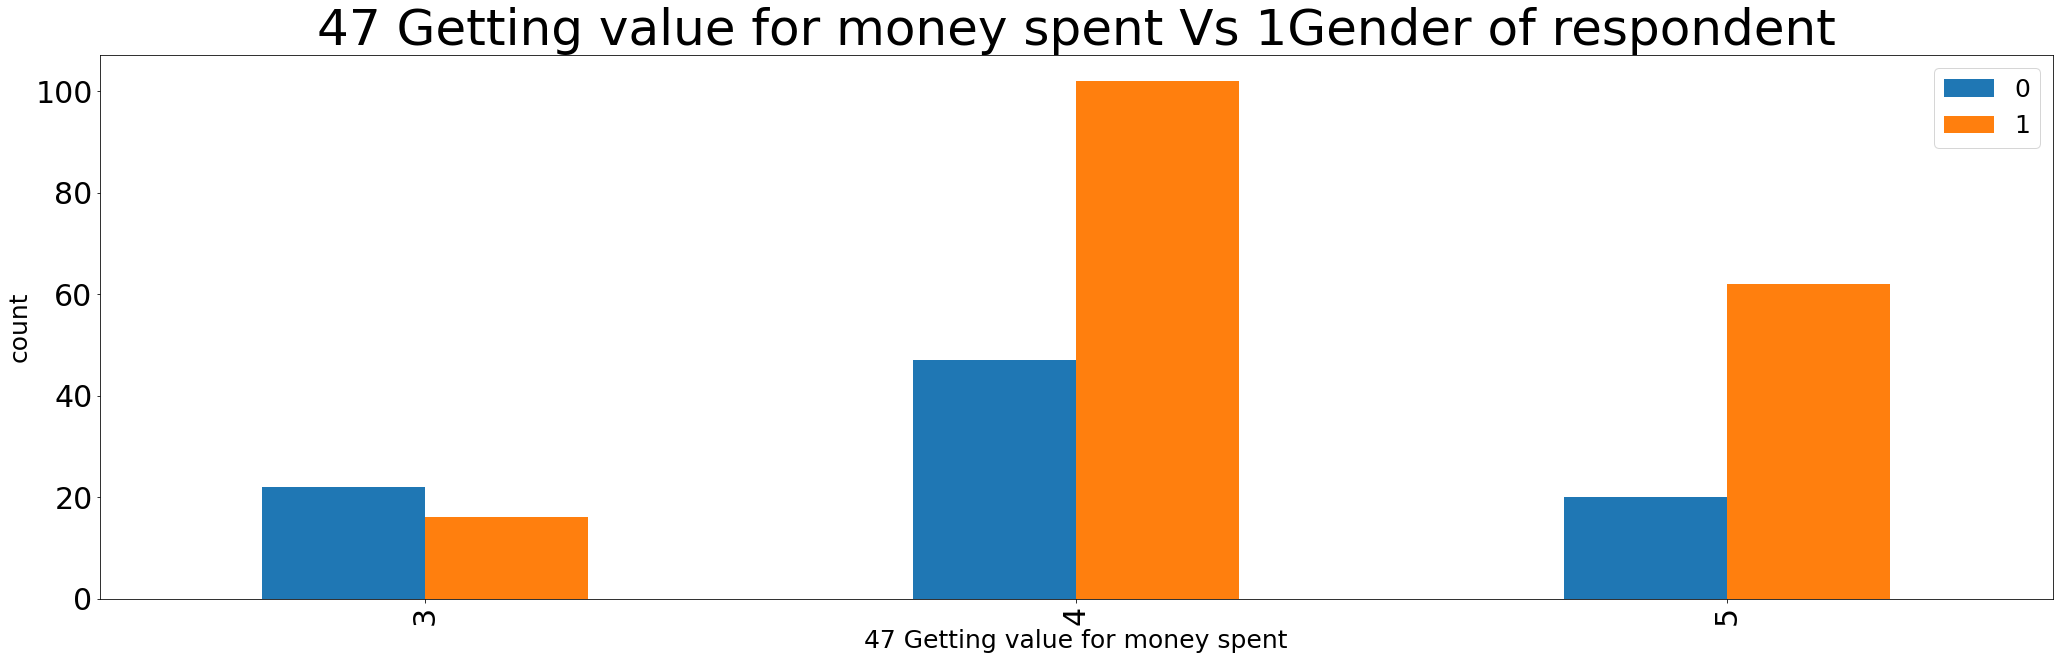

In [92]:
dis_bar('47 Getting value for money spent','1Gender of respondent')

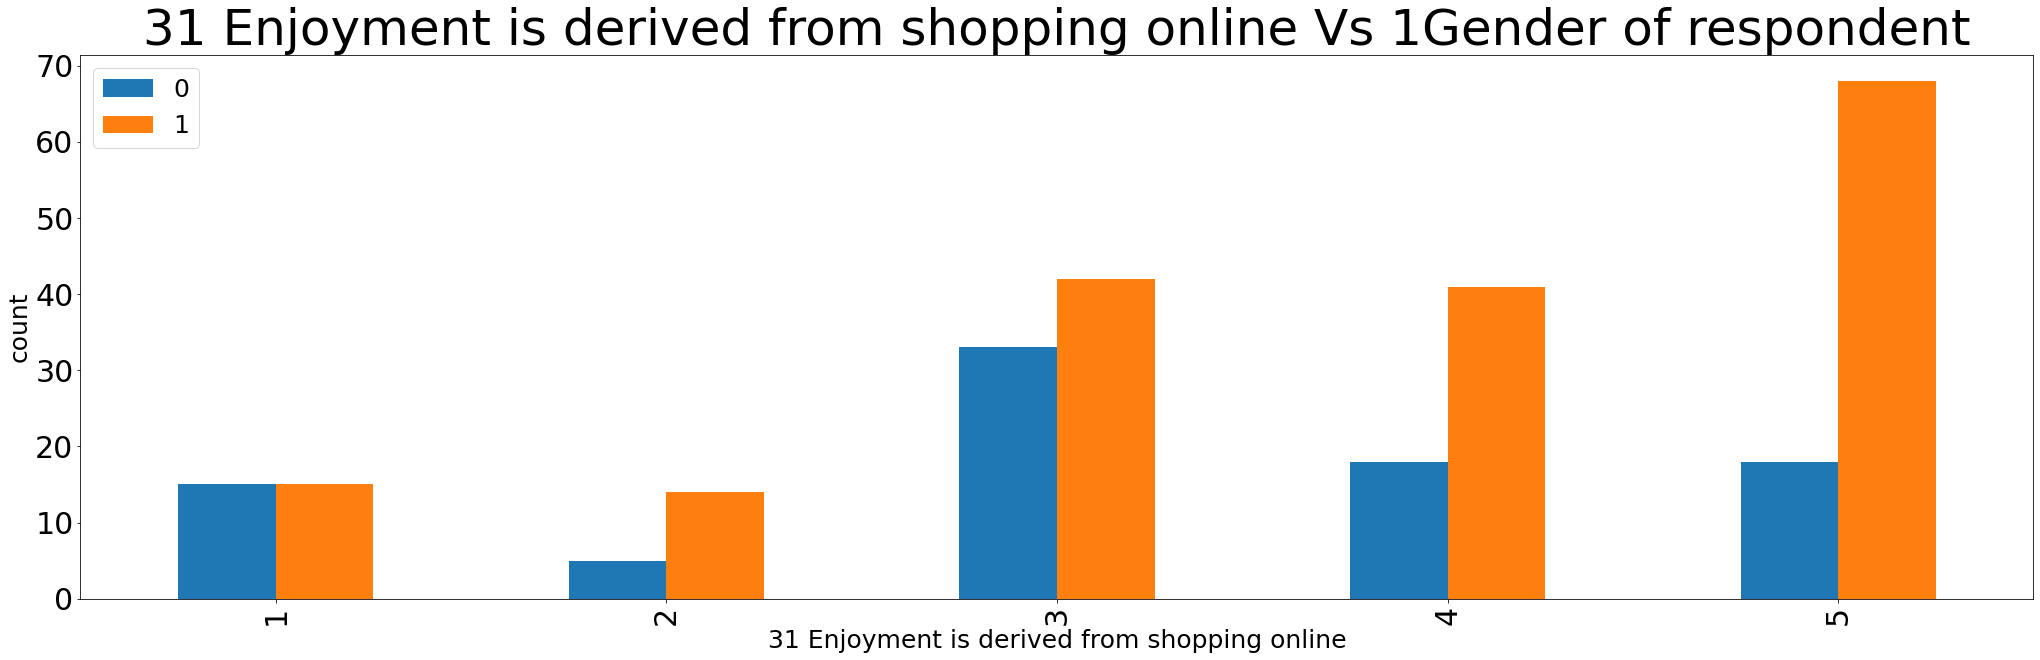

In [93]:
dis_bar('31 Enjoyment is derived from shopping online','1Gender of respondent')

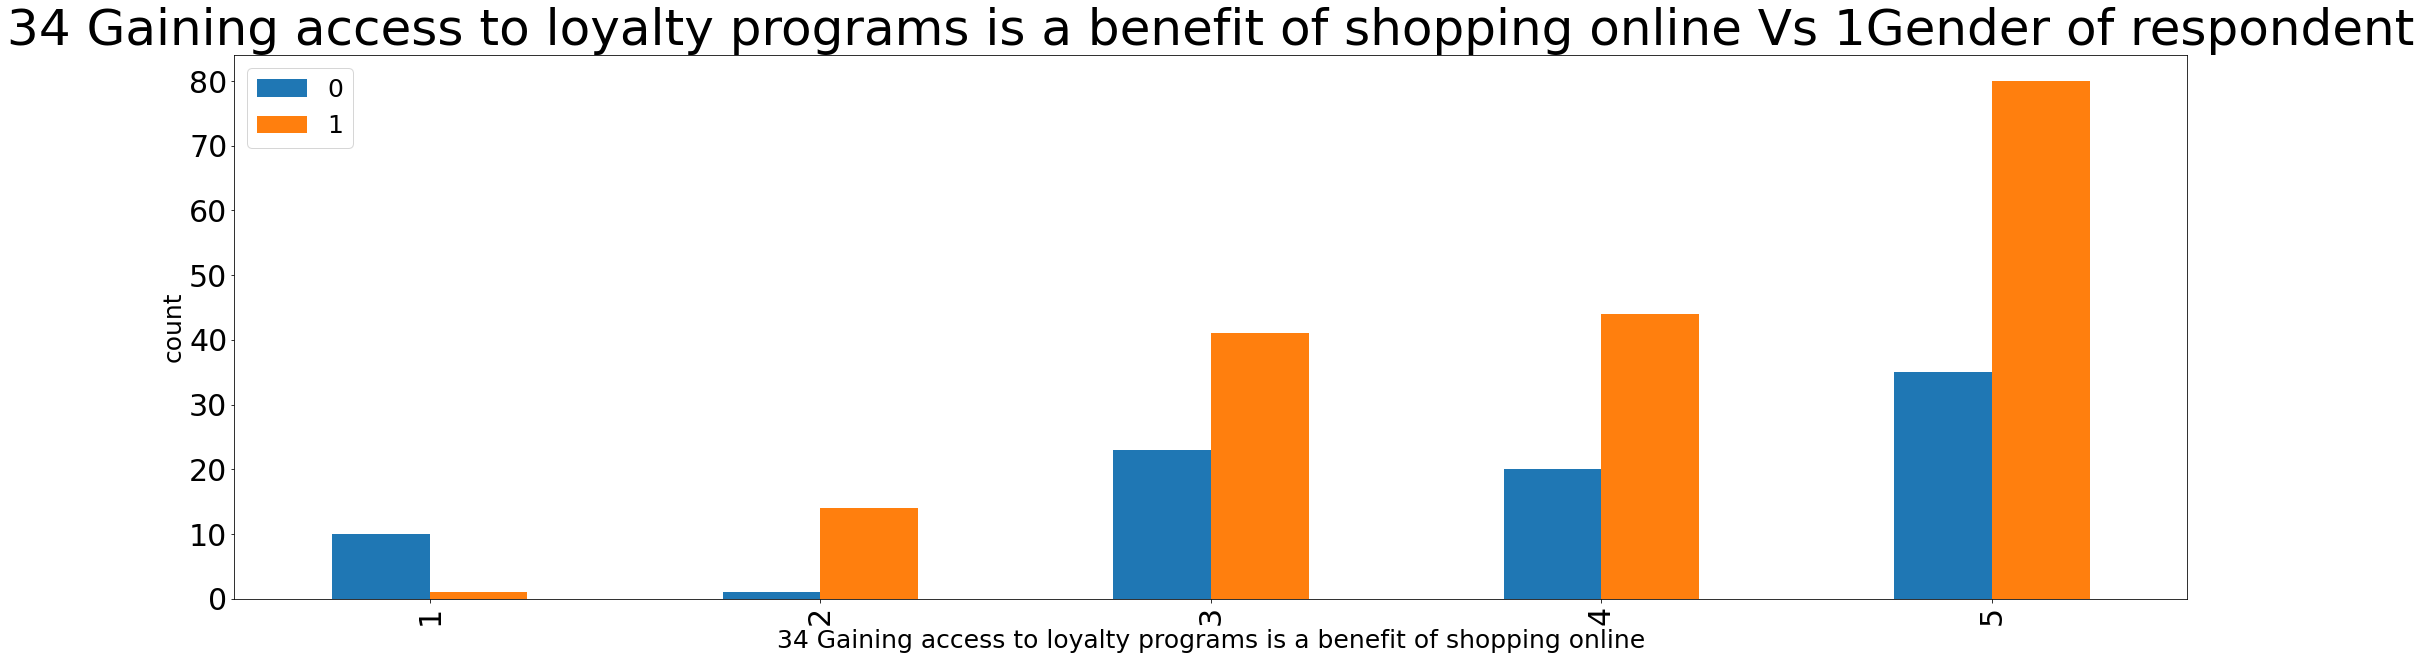

In [94]:
dis_bar('34 Gaining access to loyalty programs is a benefit of shopping online','1Gender of respondent')

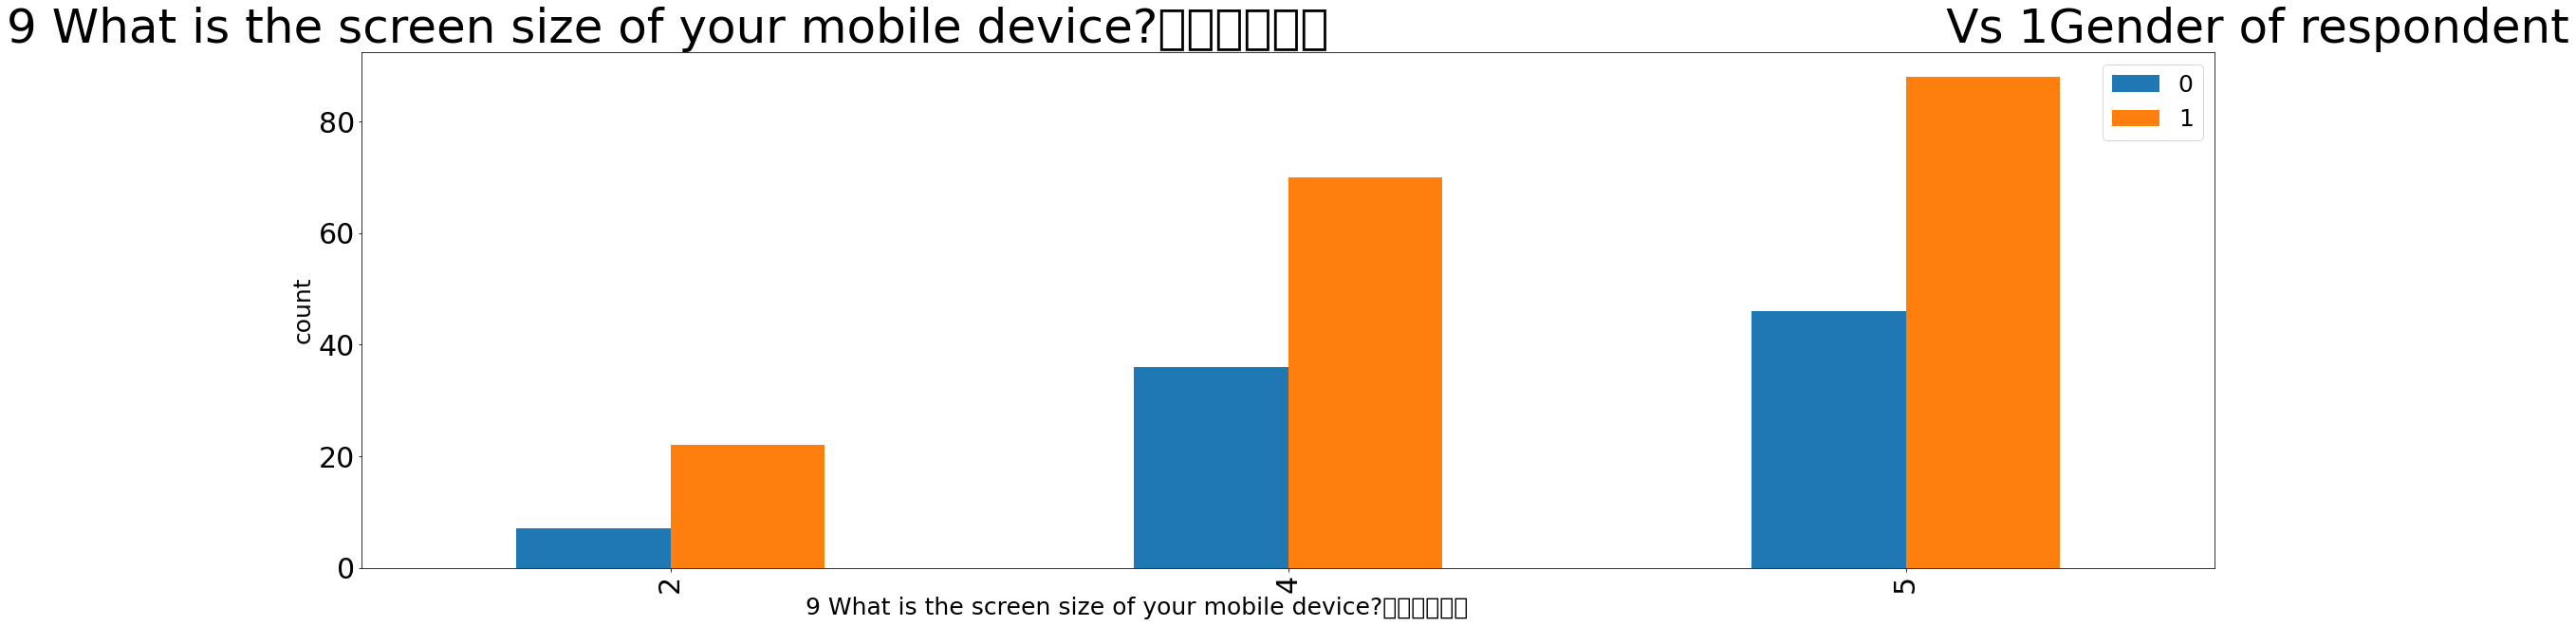

In [95]:
dis_bar('9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ','1Gender of respondent')

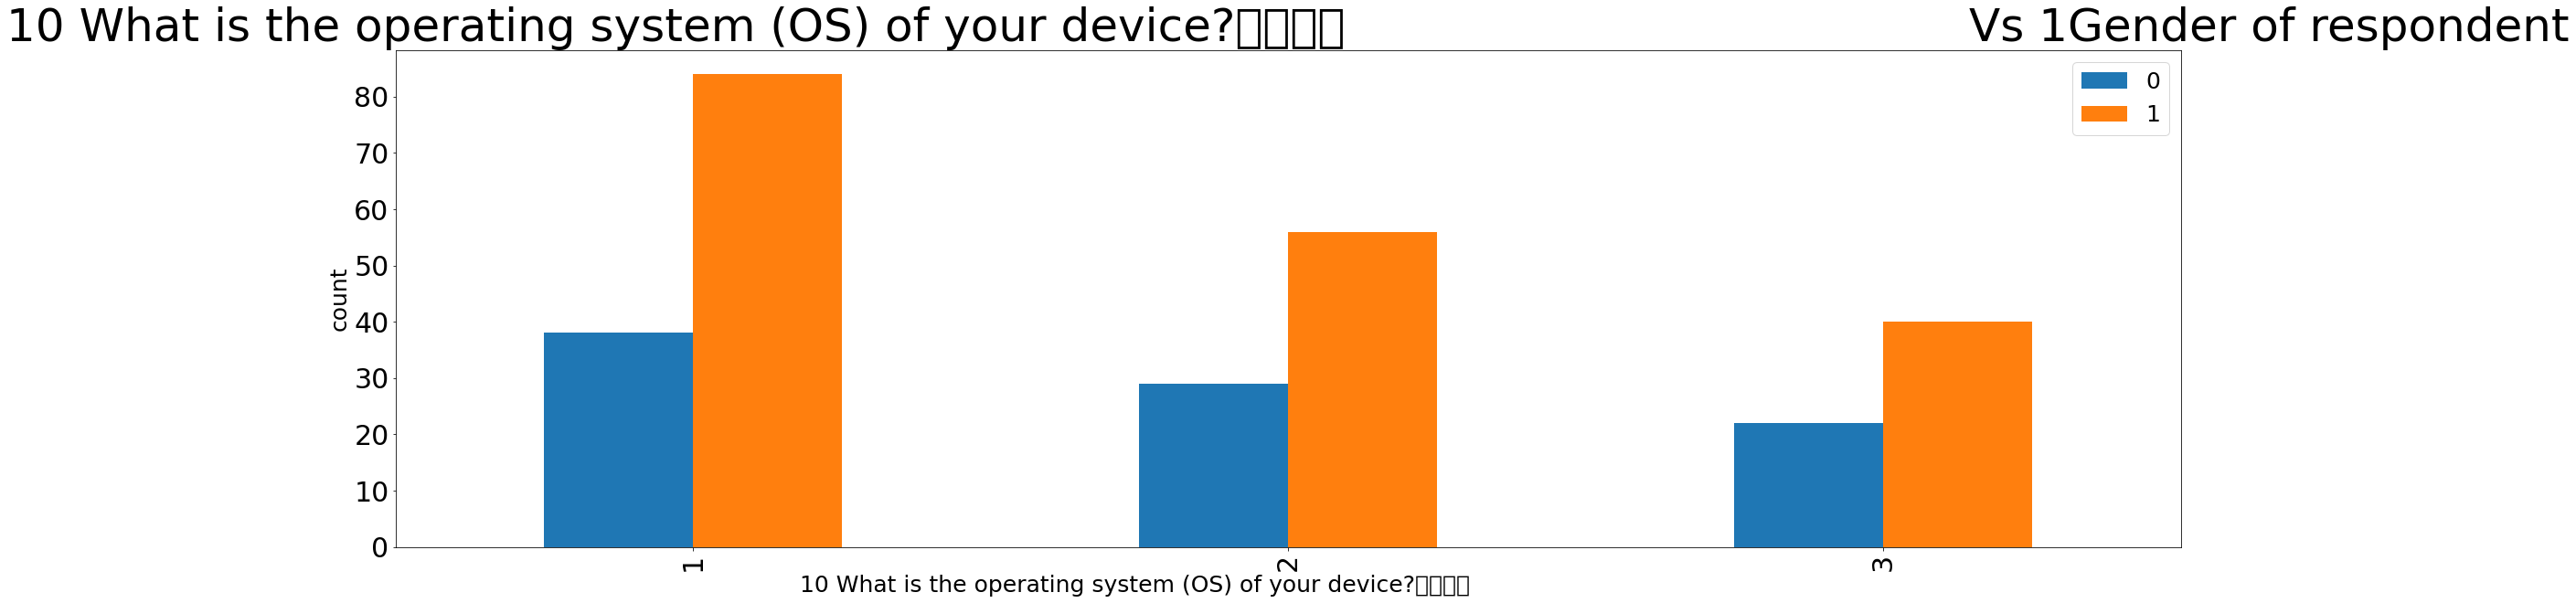

In [96]:
dis_bar('10 What is the operating system (OS) of your device?\t\t\t\t                                          ','1Gender of respondent')

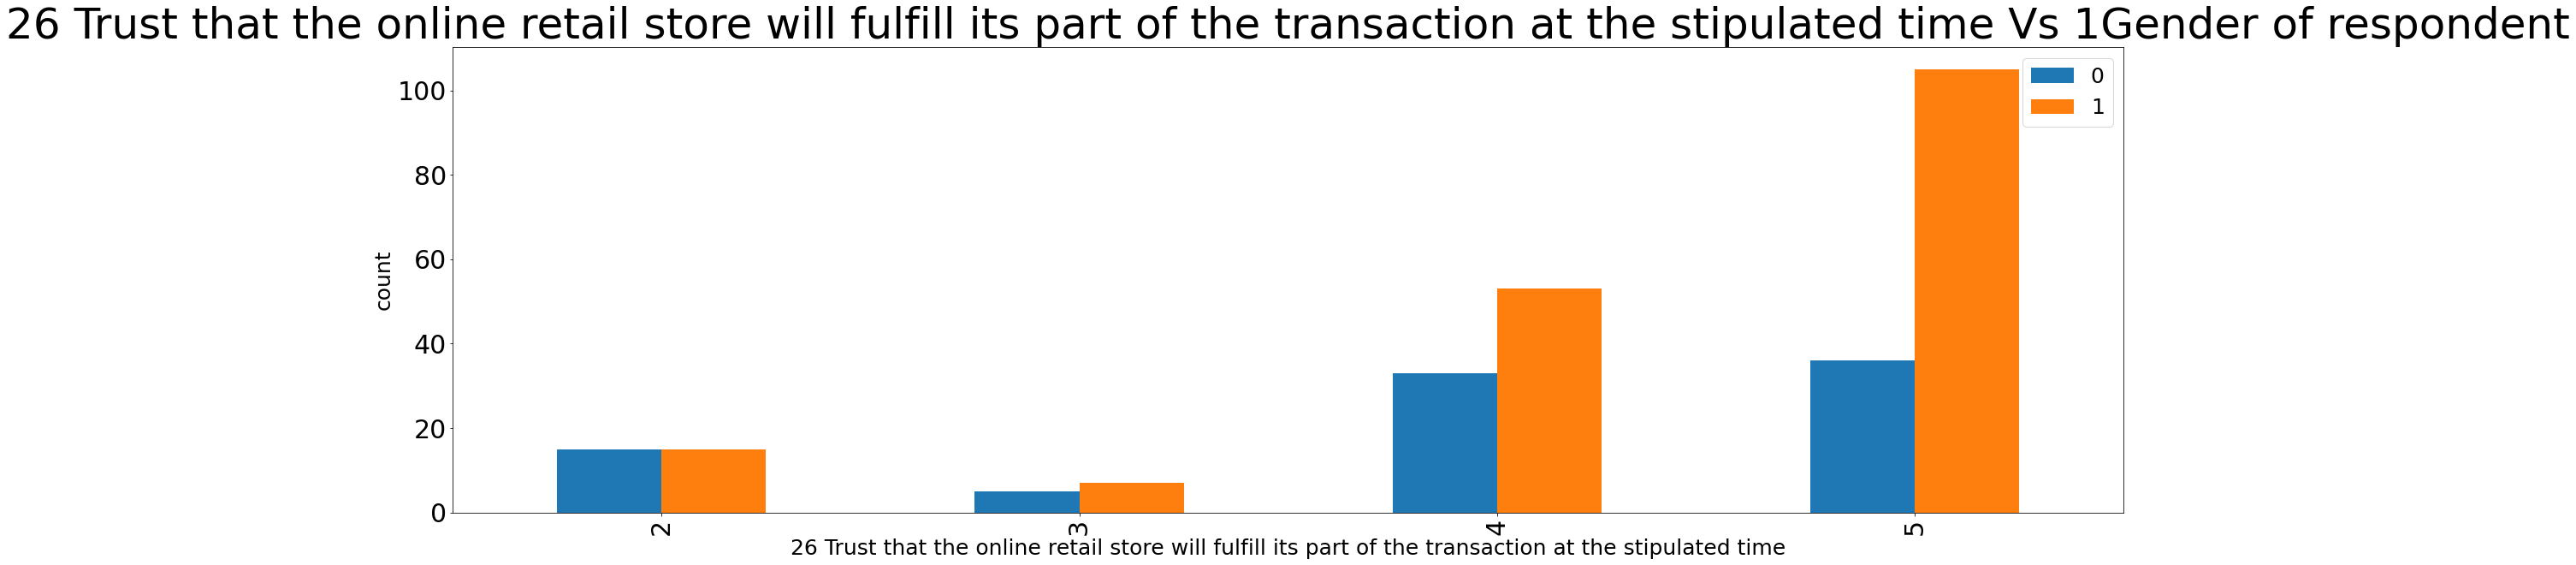

In [97]:
dis_bar('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time','1Gender of respondent')

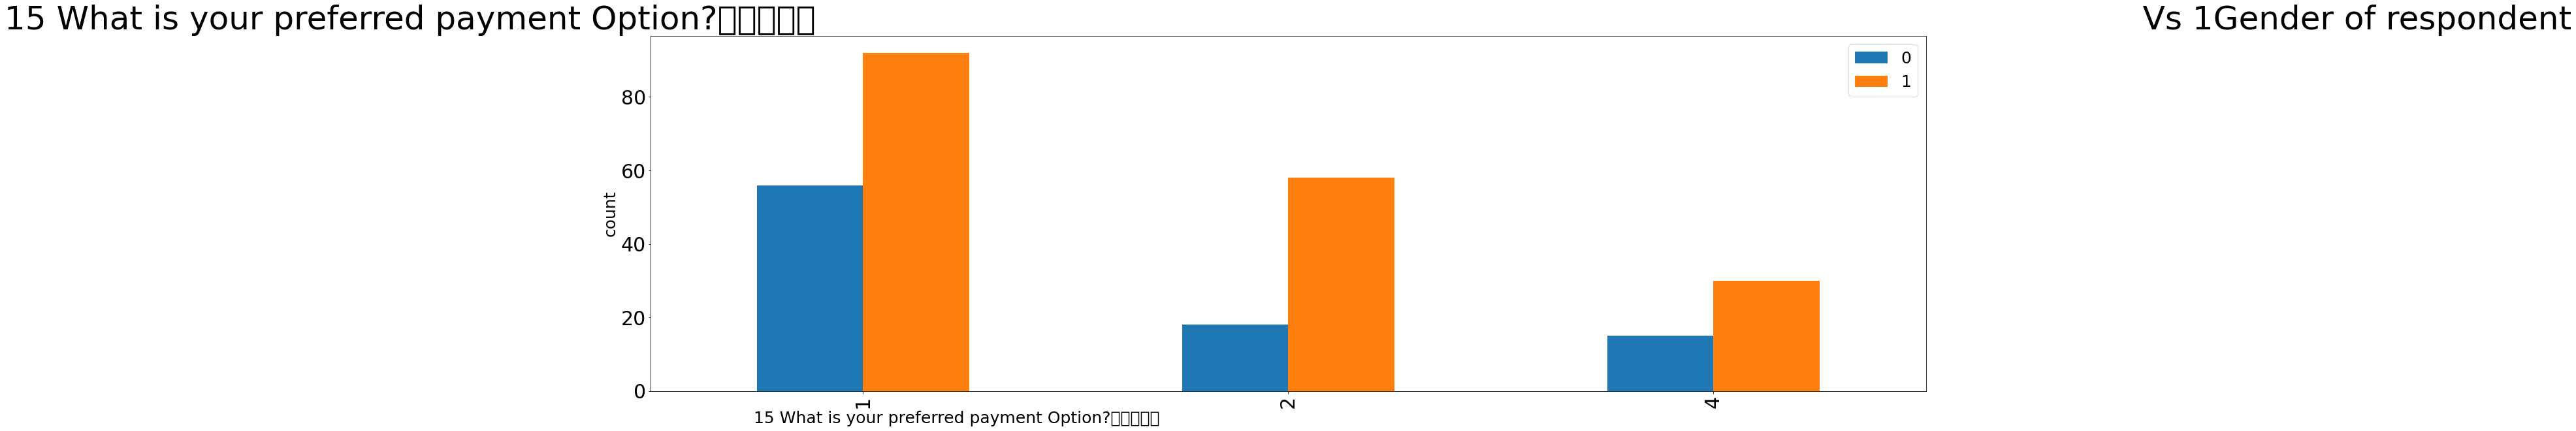

In [98]:
dis_bar('15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ','1Gender of respondent')